#### Initial exploration of dataset

In [2]:
# Import dependencies
import pandas as pd
# Read in file
df = pd.read_csv('./Resources/emails.csv')

In [3]:
# Information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
# Drop "Email No." column
df = df.drop(columns="Email No.")
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [6]:
df.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

In [7]:
# Rename columns to match postgresql table schema
df.columns = df.columns.str.lower()
df = df.add_suffix('_freq')
df = df.rename(columns={'prediction_freq':'prediction'})
df.columns

Index(['the_freq', 'to_freq', 'ect_freq', 'and_freq', 'for_freq', 'of_freq',
       'a_freq', 'you_freq', 'hou_freq', 'in_freq',
       ...
       'connevey_freq', 'jay_freq', 'valued_freq', 'lay_freq',
       'infrastructure_freq', 'military_freq', 'allowing_freq', 'ff_freq',
       'dry_freq', 'prediction_freq'],
      dtype='object', length=3001)

In [9]:
columns = list(df.columns)
columns

['the_freq',
 'to_freq',
 'ect_freq',
 'and_freq',
 'for_freq',
 'of_freq',
 'a_freq',
 'you_freq',
 'hou_freq',
 'in_freq',
 'on_freq',
 'is_freq',
 'this_freq',
 'enron_freq',
 'i_freq',
 'be_freq',
 'that_freq',
 'will_freq',
 'have_freq',
 'with_freq',
 'your_freq',
 'at_freq',
 'we_freq',
 's_freq',
 'are_freq',
 'it_freq',
 'by_freq',
 'com_freq',
 'as_freq',
 'from_freq',
 'gas_freq',
 'or_freq',
 'not_freq',
 'me_freq',
 'deal_freq',
 'if_freq',
 'meter_freq',
 'hpl_freq',
 'please_freq',
 're_freq',
 'e_freq',
 'any_freq',
 'our_freq',
 'corp_freq',
 'can_freq',
 'd_freq',
 'all_freq',
 'has_freq',
 'was_freq',
 'know_freq',
 'need_freq',
 'an_freq',
 'forwarded_freq',
 'new_freq',
 't_freq',
 'may_freq',
 'up_freq',
 'j_freq',
 'mmbtu_freq',
 'should_freq',
 'do_freq',
 'am_freq',
 'get_freq',
 'out_freq',
 'see_freq',
 'no_freq',
 'there_freq',
 'price_freq',
 'daren_freq',
 'but_freq',
 'been_freq',
 'company_freq',
 'l_freq',
 'these_freq',
 'let_freq',
 'so_freq',
 'would

In [10]:
# Create .sql file (if adding to postgres db)
with open('spambase.sql', 'a') as f:
    f.write('create table spambase (\n')
    for column in columns:
        f.write(f'\t{column} int not null,\n') # remember to delete last comma after writing
    f.write(');')

In [13]:
# Create Physical schema on quickdbd site (or import the .sql file)
with open('quickdbd_spambase_erd.txt', 'a') as f:
    f.write('# Physical\n')
    f.write('spambase\n')
    f.write('-\n')
    for column in columns:
        f.write(f'{column} int\n')
    

In [14]:
# write clean csv file
df.to_csv('.\Resources\emails_clean.csv', index=False)

#### Logistic Regression Model (Jakob)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [7]:
# Read in file
df = pd.read_csv('./Resources/emails.csv')
df.shape

(5172, 3002)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [11]:
# Drop 'Email No.' column
df = df.drop(columns='Email No.')
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


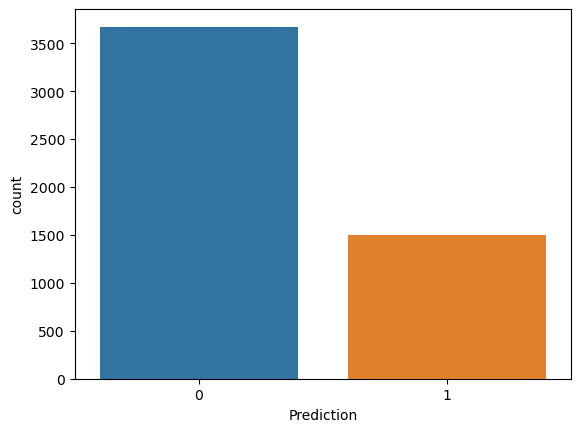

In [12]:
# Plot using Seaborn function
sns.countplot(data=df, x='Prediction')
plt.show()

In [13]:
X = df.drop(columns='Prediction', axis=1)
y = df['Prediction']

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\jason\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)

Classification Report for Logistic Regression: 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       739
           1       0.93      0.97      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



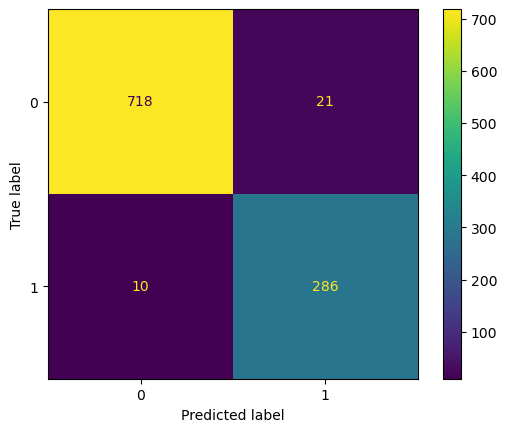

In [25]:
def eval(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report for Logistic Regression: \n')
    print(classification_report(y_test, y_pred))
    t1.plot()

eval('Model Results', y_test, y_pred)

#### Model saving/loading/testing

In [26]:
import pickle
# Saving model to disk
pickle.dump(model, open('log_reg_model.pkl', 'wb'))

In [30]:
# First sample review
X_test.iloc[0,:]

the               1
to                1
ect               1
and               0
for               1
                 ..
infrastructure    0
military          0
allowing          0
ff                0
dry               0
Name: 1566, Length: 3000, dtype: int64

In [36]:
# First sample label (0; not spam)
y_test.iloc[0]

0

In [ ]:
X_sample = X_test.iloc[0,:]
# Loading model from file
model = pickle.load(open('log_reg_model.pkl','rb'))

In [39]:
# Sample prediction (0; worked!)
print(model.predict([X_sample])[0])

[0]


c:\Users\jason\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
# Second sample
X_sample = X_test.iloc[2,:]
X_sample

the                1
to                14
ect                3
and                6
for                2
                  ..
infrastructure     0
military           0
allowing           0
ff                 5
dry                0
Name: 1235, Length: 3000, dtype: int64

In [42]:
# Predict second sample (1; worked!)
print(model.predict([X_sample])[0])

1


c:\Users\jason\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


##### With model loading and prediction samples working, next phase is to figure out mail and text parsing into the same dimensions as dataframe 'X'

In [43]:
X.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'enhancements', 'connevey', 'jay', 'valued', 'lay', 'infrastructure',
       'military', 'allowing', 'ff', 'dry'],
      dtype='object', length=3000)

In [44]:
list(X.columns)

['the',
 'to',
 'ect',
 'and',
 'for',
 'of',
 'a',
 'you',
 'hou',
 'in',
 'on',
 'is',
 'this',
 'enron',
 'i',
 'be',
 'that',
 'will',
 'have',
 'with',
 'your',
 'at',
 'we',
 's',
 'are',
 'it',
 'by',
 'com',
 'as',
 'from',
 'gas',
 'or',
 'not',
 'me',
 'deal',
 'if',
 'meter',
 'hpl',
 'please',
 're',
 'e',
 'any',
 'our',
 'corp',
 'can',
 'd',
 'all',
 'has',
 'was',
 'know',
 'need',
 'an',
 'forwarded',
 'new',
 't',
 'may',
 'up',
 'j',
 'mmbtu',
 'should',
 'do',
 'am',
 'get',
 'out',
 'see',
 'no',
 'there',
 'price',
 'daren',
 'but',
 'been',
 'company',
 'l',
 'these',
 'let',
 'so',
 'would',
 'm',
 'into',
 'xls',
 'farmer',
 'attached',
 'us',
 'information',
 'they',
 'message',
 'day',
 'time',
 'my',
 'one',
 'what',
 'only',
 'http',
 'th',
 'volume',
 'mail',
 'contract',
 'which',
 'month',
 'more',
 'robert',
 'sitara',
 'about',
 'texas',
 'nom',
 'energy',
 'pec',
 'questions',
 'www',
 'deals',
 'volumes',
 'pm',
 'ena',
 'now',
 'their',
 'file',
 's

In [45]:
column_df = pd.DataFrame(list(X.columns))
column_df

,0
0,the
1,to
2,ect
3,and
4,for
...,...
2995,infrastructure
2996,military
2997,allowing
2998,ff


In [47]:
# Save 'X' column names to a csv (for use later to find word frequency)
column_df.to_csv('./Resources/columns.csv', sep=',', index=False, header=False)

#### Mail-parser exploration

In [1]:
!pip install mail-parser

  Obtaining dependency information for simplejson>=3.17.0 from https://files.pythonhosted.org/packages/b6/8e/3e12d122dfdf549a8d12eaf39954ee39f2027060aa38b63430f8ab3244e7/simplejson-3.19.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/75.3 kB ? eta -:--:--
   ---------------------------------------- 75.3/75.3 kB 4.1 MB/s eta 0:00:00


In [2]:
# Import library
import mailparser

In [3]:
mail = mailparser.parse_from_file('./Resources/0_chase.eml')

In [4]:
mail.body

'<!-- Start of PRODUCT_NAME-->\n<!-- End of PRODUCT_NAME-->\n\n\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n<link rel="shortcut icon" href="https://images.harmony.epsilon.com/ContentHandler/images/262e305a-f2fe-4ea8-afc0-bc8ee2e33717/SYSTEM/chase_bug_16_16.ico">\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\n<title></title>\n<style type="text/css">\n* {\n    line-height: normal !important;\n}\nstrong {\n    font-weight: bold !important;\n}\nem {\n    font-style: italic !important;\n}\nbody {\n    background-color: #ebebeb !important;\n    -webkit-text-size-adjust: none !important;\n}\n.ExternalClass * {\n    line-height: 112%\n}\n.ExternalClass p, .ExternalClass span, .ExternalClass font, .ExternalClass td {\n    line-height: 112%\n}\ntd {\n    -web

In [5]:
mail.text_plain

[]

In [6]:
mail.text_html

['<!-- Start of PRODUCT_NAME-->\n<!-- End of PRODUCT_NAME-->\n\n\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n<link rel="shortcut icon" href="https://images.harmony.epsilon.com/ContentHandler/images/262e305a-f2fe-4ea8-afc0-bc8ee2e33717/SYSTEM/chase_bug_16_16.ico">\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\n<title></title>\n<style type="text/css">\n* {\n    line-height: normal !important;\n}\nstrong {\n    font-weight: bold !important;\n}\nem {\n    font-style: italic !important;\n}\nbody {\n    background-color: #ebebeb !important;\n    -webkit-text-size-adjust: none !important;\n}\n.ExternalClass * {\n    line-height: 112%\n}\n.ExternalClass p, .ExternalClass span, .ExternalClass font, .ExternalClass td {\n    line-height: 112%\n}\ntd {\n    -we

In [7]:
mail.attachments

[]

#### Content-Type HTML exploration

In [8]:
# Import BeautifulSoup for html parsing (mail.text_html is True)
from bs4 import BeautifulSoup

In [10]:
soup = BeautifulSoup(mail.text_html[0], 'html.parser')
print(soup)

<!-- Start of PRODUCT_NAME-->
<!-- End of PRODUCT_NAME-->
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<link href="https://images.harmony.epsilon.com/ContentHandler/images/262e305a-f2fe-4ea8-afc0-bc8ee2e33717/SYSTEM/chase_bug_16_16.ico" rel="shortcut icon"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title></title>
<style type="text/css">
* {
    line-height: normal !important;
}
strong {
    font-weight: bold !important;
}
em {
    font-style: italic !important;
}
body {
    background-color: #ebebeb !important;
    -webkit-text-size-adjust: none !important;
}
.ExternalClass * {
    line-height: 112%
}
.ExternalClass p, .ExternalClass span, .ExternalClass font, .ExternalClass td {
    line-height: 112%
}
td {
    -webkit-text-size-adjust: none;
}
a[hr

In [12]:
soup.get_text()

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nEmail Security Information:\n\n\nEmail intended for: Jason Estrada\n\n                        For your account ending in: 8780\n\n                        If you have concerns about the authenticity of this message, please visit chase.com/CustomerService for options on how to contact us. \n\n\n\n\n\n\nChase Sapphire Reserve® credit card ending in 8780\n\n\nWe want to inform you of upcoming changes to your Cardmember Agreement. You\'ll find more details about these changes and what they mean for you under "Important Changes to your Account Terms".\n\n\n\n\n\n\n\n\n\n•\nWe\'re introducing Chase Pay Over TimeSM, a suite of installment features that allow eligible customers to pay for select purchases or account balances in equal monthly payments.\n\n\n•\nMy Chase Plan® will become part of Chase Pay Over Time. For eligible accounts, there are no changes to the functionality of this feature or active plans. Starting in 2024 there will be name changes 

In [13]:
# raw; need to remove \n, special characters, replace ",.'" with " ", and all that
raw_text = soup.get_text()

In [15]:
# First step removes most \n and whitespace; additional replace for extraneous \n
soup.get_text(separator='\n', strip=True).replace('\n'," ")

'Email Security Information: Email intended for: Jason Estrada For your account ending in: 8780 If you have concerns about the authenticity of this message, please visit chase.com/CustomerService for options on how to contact us. Chase Sapphire Reserve ® credit card ending in 8780 We want to inform you of upcoming changes to your Cardmember Agreement. You\'ll find more details about these changes and what they mean for you under "Important Changes to your Account Terms". • We\'re introducing Chase Pay Over Time SM , a suite of installment features that allow eligible customers to pay for select purchases or account balances in equal monthly payments. • My Chase Plan ® will become part of Chase Pay Over Time. For eligible accounts, there are no changes to the functionality of this feature or active plans. Starting in 2024 there will be name changes throughout your experience with us. As a valued customer, we encourage you to continue making your payments by the due date to avoid penalti

In [16]:
text_1 = soup.get_text(separator='\n', strip=True).replace('\n'," ")
text_1

'Email Security Information: Email intended for: Jason Estrada For your account ending in: 8780 If you have concerns about the authenticity of this message, please visit chase.com/CustomerService for options on how to contact us. Chase Sapphire Reserve ® credit card ending in 8780 We want to inform you of upcoming changes to your Cardmember Agreement. You\'ll find more details about these changes and what they mean for you under "Important Changes to your Account Terms". • We\'re introducing Chase Pay Over Time SM , a suite of installment features that allow eligible customers to pay for select purchases or account balances in equal monthly payments. • My Chase Plan ® will become part of Chase Pay Over Time. For eligible accounts, there are no changes to the functionality of this feature or active plans. Starting in 2024 there will be name changes throughout your experience with us. As a valued customer, we encourage you to continue making your payments by the due date to avoid penalti

In [26]:
# Need regex for additional string cleaning
import re

In [29]:
p1 = r'[^a-z ]'
p2 = r'( {2,})'
text_2 = re.sub(p1, '', text_1.lower())
text_3 = re.sub(p2, ' ', text_2)

In [30]:
text_3

'email security information email intended for jason estrada for your account ending in if you have concerns about the authenticity of this message please visit chasecomcustomerservice for options on how to contact us chase sapphire reserve credit card ending in we want to inform you of upcoming changes to your cardmember agreement youll find more details about these changes and what they mean for you under important changes to your account terms were introducing chase pay over time sm a suite of installment features that allow eligible customers to pay for select purchases or account balances in equal monthly payments my chase plan will become part of chase pay over time for eligible accounts there are no changes to the functionality of this feature or active plans starting in there will be name changes throughout your experience with us as a valued customer we encourage you to continue making your payments by the due date to avoid penalties to help you make payments by your due date 

In [31]:
word_list = text_3.split()

In [34]:
import pandas as pd

In [ ]:
word_df = pd.DataFrame({'words':word_list})
# word_count_df = pd.DataFrame(word_df['words'].value_counts())
# word_count_df

In [44]:
word_count_df = pd.DataFrame(word_df.groupby('words').value_counts())

In [48]:
word_count_df = word_count_df.rename(columns={0:'count'})
word_count_df

,count
words,
a,21
able,1
about,6
above,1
account,15
...,...
would,1
yet,1
you,24


In [49]:
word_count_df.reset_index(names='word',inplace=True)

In [64]:
# If spambase word matches word_count_df word
word_count_df[word_count_df['word']=='the']

,word,count
301,the,55


In [63]:
word_count_df[word_count_df['word']=='the']['count'].values[0]

55

In [65]:
# If spambase word doesn't match word_count_df word
word_count_df[word_count_df['word']=='enron']

,word,count


In [68]:
word_count_df[word_count_df['word']=='enron']['count'].values

array([], dtype=int64)

#### Create spambase df and word list

- Read in columns.csv as list 

In [71]:
spambase_df = pd.read_csv('./Resources/columns.csv', header=None)
spambase_df

,0
0,the
1,to
2,ect
3,and
4,for
...,...
2995,infrastructure
2996,military
2997,allowing
2998,ff


In [78]:
# List of words from spambase (features/X)
spambase_list = list(spambase_df.iloc[:,0])
spambase_list

['the',
 'to',
 'ect',
 'and',
 'for',
 'of',
 'a',
 'you',
 'hou',
 'in',
 'on',
 'is',
 'this',
 'enron',
 'i',
 'be',
 'that',
 'will',
 'have',
 'with',
 'your',
 'at',
 'we',
 's',
 'are',
 'it',
 'by',
 'com',
 'as',
 'from',
 'gas',
 'or',
 'not',
 'me',
 'deal',
 'if',
 'meter',
 'hpl',
 'please',
 're',
 'e',
 'any',
 'our',
 'corp',
 'can',
 'd',
 'all',
 'has',
 'was',
 'know',
 'need',
 'an',
 'forwarded',
 'new',
 't',
 'may',
 'up',
 'j',
 'mmbtu',
 'should',
 'do',
 'am',
 'get',
 'out',
 'see',
 'no',
 'there',
 'price',
 'daren',
 'but',
 'been',
 'company',
 'l',
 'these',
 'let',
 'so',
 'would',
 'm',
 'into',
 'xls',
 'farmer',
 'attached',
 'us',
 'information',
 'they',
 'message',
 'day',
 'time',
 'my',
 'one',
 'what',
 'only',
 'http',
 'th',
 'volume',
 'mail',
 'contract',
 'which',
 'month',
 'more',
 'robert',
 'sitara',
 'about',
 'texas',
 'nom',
 'energy',
 'pec',
 'questions',
 'www',
 'deals',
 'volumes',
 'pm',
 'ena',
 'now',
 'their',
 'file',
 's

In [82]:
# List of words from sample e-mail text
word_count_list = list(word_count_df.iloc[:,0])
word_count_list

['a',
 'able',
 'about',
 'above',
 'account',
 'accounts',
 'activation',
 'active',
 'add',
 'additional',
 'advance',
 'advances',
 'advantage',
 'after',
 'aggregate',
 'agreement',
 'alerts',
 'allocation',
 'allow',
 'already',
 'amend',
 'amended',
 'amendment',
 'amount',
 'an',
 'and',
 'annual',
 'any',
 'anytime',
 'app',
 'applied',
 'apply',
 'apr',
 'are',
 'as',
 'at',
 'authenticity',
 'auto',
 'available',
 'avoid',
 'b',
 'back',
 'balance',
 'balances',
 'bank',
 'based',
 'be',
 'become',
 'before',
 'behavior',
 'being',
 'billing',
 'both',
 'box',
 'but',
 'by',
 'calculated',
 'called',
 'can',
 'capacity',
 'card',
 'cardbased',
 'cardmember',
 'cash',
 'cashlike',
 'center',
 'certain',
 'change',
 'changes',
 'charge',
 'charges',
 'chase',
 'chasecom',
 'chasecomalerts',
 'chasecomautopay',
 'chasecomcustomerservice',
 'check',
 'checkout',
 'checks',
 'choose',
 'closed',
 'co',
 'concerns',
 'conditions',
 'contact',
 'contains',
 'continue',
 'convenient'

#### Building of X_sample for prediction

In [88]:
# X_sample = pd.DataFrame()
# X_sample
#del X_sample
sample_dict = {}

In [91]:
sample_dict

{}

In [92]:
sample_dict['the'] = 0
sample_dict

{'the': 0}

In [93]:
sample_dict['to'] = 15
sample_dict

{'the': 0, 'to': 15}

In [85]:
X_sample['enron'] = 0
X_sample

,enron


In [94]:
del sample_dict

In [95]:
# Create sample_dict
sample_dict = {}

# Build sample

for word in spambase_list:
    if word not in word_count_list:
        # Set word count to 0 for 'spambase_list' words not in 'word_count_list'
        sample_dict[word] = 0
    else:
        # Get count value of word from 'word_count_df'
        sample_dict[word] = word_count_df[word_count_df['word']==word]['count'].values[0]

sample_dict

{'the': 55,
 'to': 53,
 'ect': 0,
 'and': 25,
 'for': 18,
 'of': 36,
 'a': 21,
 'you': 24,
 'hou': 0,
 'in': 14,
 'on': 14,
 'is': 16,
 'this': 8,
 'enron': 0,
 'i': 0,
 'be': 10,
 'that': 5,
 'will': 10,
 'have': 4,
 'with': 12,
 'your': 35,
 'at': 10,
 'we': 12,
 's': 0,
 'are': 7,
 'it': 3,
 'by': 3,
 'com': 0,
 'as': 11,
 'from': 3,
 'gas': 0,
 'or': 19,
 'not': 8,
 'me': 0,
 'deal': 0,
 'if': 3,
 'meter': 0,
 'hpl': 0,
 'please': 1,
 're': 0,
 'e': 0,
 'any': 5,
 'our': 6,
 'corp': 0,
 'can': 4,
 'd': 2,
 'all': 0,
 'has': 0,
 'was': 1,
 'know': 0,
 'need': 0,
 'an': 2,
 'forwarded': 0,
 'new': 5,
 't': 0,
 'may': 9,
 'up': 2,
 'j': 0,
 'mmbtu': 0,
 'should': 0,
 'do': 0,
 'am': 0,
 'get': 0,
 'out': 0,
 'see': 1,
 'no': 3,
 'there': 2,
 'price': 0,
 'daren': 0,
 'but': 1,
 'been': 0,
 'company': 0,
 'l': 0,
 'these': 3,
 'let': 0,
 'so': 0,
 'would': 1,
 'm': 0,
 'into': 0,
 'xls': 0,
 'farmer': 0,
 'attached': 0,
 'us': 7,
 'information': 6,
 'they': 2,
 'message': 3,
 'day': 1,

In [97]:
# Create X_sample from sample e-mail text information (word count)
X_sample = pd.Series(sample_dict)
X_sample

the               55
to                53
ect                0
and               25
for               18
                  ..
infrastructure     0
military           0
allowing           0
ff                 0
dry                0
Length: 3000, dtype: int64

#### Model load and prediction

In [98]:
import pickle

In [100]:
# Load model from file
model = pickle.load(open('log_reg_model.pkl','rb'))

In [101]:
# Sample prediction from e-mail; looks like it worked
print(model.predict([X_sample])[0])

0


c:\Users\jason\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Content-Type Plain Text exploration

In [102]:
mail = mailparser.parse_from_file('./Resources/1_text_ss_suspension.eml')

In [103]:
mail.body

' Notice contains sensitive information to be opened in private.\n\nIn the states of New Mexico and Texas, criminal activity has been conducted using your Social Security Number.\xa0\n\nThe Federal Trade Commission has identified a multitude of foreign wire transactions to account numbers on a blacklist.\n\nYour Social Security Number and identity have been linked to drug trafficking.\xa0\n\nYour\xa0banks have been utilised for money Laundering. Based on the evidence, the State court has issued a judgment canceling your Social Security card.\n\nAttached is an Official Notice from Social Security under the direction of the Texas Attorney General.\n\n'

In [105]:
mail.text_plain

[' Notice contains sensitive information to be opened in private.\n\nIn the states of New Mexico and Texas, criminal activity has been conducted using your Social Security Number.\xa0\n\nThe Federal Trade Commission has identified a multitude of foreign wire transactions to account numbers on a blacklist.\n\nYour Social Security Number and identity have been linked to drug trafficking.\xa0\n\nYour\xa0banks have been utilised for money Laundering. Based on the evidence, the State court has issued a judgment canceling your Social Security card.\n\nAttached is an Official Notice from Social Security under the direction of the Texas Attorney General.\n\n']

In [107]:
bool(mail.text_plain)

True

In [106]:
mail.text_html

[]

In [108]:
bool(mail.text_html)

False

In [109]:
# Text parsing (mail.text_plain is True)
raw_text = mail.text_plain[0]
raw_text

' Notice contains sensitive information to be opened in private.\n\nIn the states of New Mexico and Texas, criminal activity has been conducted using your Social Security Number.\xa0\n\nThe Federal Trade Commission has identified a multitude of foreign wire transactions to account numbers on a blacklist.\n\nYour Social Security Number and identity have been linked to drug trafficking.\xa0\n\nYour\xa0banks have been utilised for money Laundering. Based on the evidence, the State court has issued a judgment canceling your Social Security card.\n\nAttached is an Official Notice from Social Security under the direction of the Texas Attorney General.\n\n'

In [114]:
text_1 = raw_text.strip().replace('\n',' ').replace('\xa0',' ').lower()
text_1

'notice contains sensitive information to be opened in private.  in the states of new mexico and texas, criminal activity has been conducted using your social security number.   the federal trade commission has identified a multitude of foreign wire transactions to account numbers on a blacklist.  your social security number and identity have been linked to drug trafficking.   your banks have been utilised for money laundering. based on the evidence, the state court has issued a judgment canceling your social security card.  attached is an official notice from social security under the direction of the texas attorney general.'

In [115]:
p1 = r'[^a-z ]'
p2 = r'( {2,})'
text_2 = re.sub(p1, '', text_1.lower())
text_3 = re.sub(p2, ' ', text_2)

In [116]:
text_3

'notice contains sensitive information to be opened in private in the states of new mexico and texas criminal activity has been conducted using your social security number the federal trade commission has identified a multitude of foreign wire transactions to account numbers on a blacklist your social security number and identity have been linked to drug trafficking your banks have been utilised for money laundering based on the evidence the state court has issued a judgment canceling your social security card attached is an official notice from social security under the direction of the texas attorney general'

In [117]:
word_list = text_3.split()

word_df = pd.DataFrame({'words':word_list})
word_count_df = pd.DataFrame(word_df.groupby('words').value_counts())
word_count_df = word_count_df.rename(columns={0:'count'})
word_count_df.reset_index(names='word',inplace=True)
word_count_df

,word,count
0,a,3
1,account,1
2,activity,1
3,an,1
4,and,2
...,...,...
61,under,1
62,using,1
63,utilised,1
64,wire,1


In [118]:
word_count_list = list(word_count_df.iloc[:,0])
word_count_list

['a',
 'account',
 'activity',
 'an',
 'and',
 'attached',
 'attorney',
 'banks',
 'based',
 'be',
 'been',
 'blacklist',
 'canceling',
 'card',
 'commission',
 'conducted',
 'contains',
 'court',
 'criminal',
 'direction',
 'drug',
 'evidence',
 'federal',
 'for',
 'foreign',
 'from',
 'general',
 'has',
 'have',
 'identified',
 'identity',
 'in',
 'information',
 'is',
 'issued',
 'judgment',
 'laundering',
 'linked',
 'mexico',
 'money',
 'multitude',
 'new',
 'notice',
 'number',
 'numbers',
 'of',
 'official',
 'on',
 'opened',
 'private',
 'security',
 'sensitive',
 'social',
 'state',
 'states',
 'texas',
 'the',
 'to',
 'trade',
 'trafficking',
 'transactions',
 'under',
 'using',
 'utilised',
 'wire',
 'your']

In [119]:
# Create sample_dict
sample_dict = {}

# Build sample

for word in spambase_list:
    if word not in word_count_list:
        # Set word count to 0 for 'spambase_list' words not in 'word_count_list'
        sample_dict[word] = 0
    else:
        # Get count value of word from 'word_count_df'
        sample_dict[word] = word_count_df[word_count_df['word']==word]['count'].values[0]

sample_dict

{'the': 6,
 'to': 3,
 'ect': 0,
 'and': 2,
 'for': 1,
 'of': 3,
 'a': 3,
 'you': 0,
 'hou': 0,
 'in': 2,
 'on': 2,
 'is': 1,
 'this': 0,
 'enron': 0,
 'i': 0,
 'be': 1,
 'that': 0,
 'will': 0,
 'have': 2,
 'with': 0,
 'your': 4,
 'at': 0,
 'we': 0,
 's': 0,
 'are': 0,
 'it': 0,
 'by': 0,
 'com': 0,
 'as': 0,
 'from': 1,
 'gas': 0,
 'or': 0,
 'not': 0,
 'me': 0,
 'deal': 0,
 'if': 0,
 'meter': 0,
 'hpl': 0,
 'please': 0,
 're': 0,
 'e': 0,
 'any': 0,
 'our': 0,
 'corp': 0,
 'can': 0,
 'd': 0,
 'all': 0,
 'has': 3,
 'was': 0,
 'know': 0,
 'need': 0,
 'an': 1,
 'forwarded': 0,
 'new': 1,
 't': 0,
 'may': 0,
 'up': 0,
 'j': 0,
 'mmbtu': 0,
 'should': 0,
 'do': 0,
 'am': 0,
 'get': 0,
 'out': 0,
 'see': 0,
 'no': 0,
 'there': 0,
 'price': 0,
 'daren': 0,
 'but': 0,
 'been': 3,
 'company': 0,
 'l': 0,
 'these': 0,
 'let': 0,
 'so': 0,
 'would': 0,
 'm': 0,
 'into': 0,
 'xls': 0,
 'farmer': 0,
 'attached': 1,
 'us': 0,
 'information': 1,
 'they': 0,
 'message': 0,
 'day': 0,
 'time': 0,
 'my'

In [ ]:
# Create X_sample from sample e-mail text information (word count)
X_sample = pd.Series(sample_dict)
X_sample

In [121]:
# Sample prediction from e-mail; looks like it worked, but counted it as not spam (false negative)
model.predict([X_sample])[0]

c:\Users\jason\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0